### Notes :
On ne veut pas prédire l'erreur, mais la dispersion autour de l'erreur.

Idée : Construire un "arbre" qui maximise la dispersion.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
train = pd.read_csv('data/s1_intermediate/train.csv')
train.set_index('parcelid')

,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
parcelid,,,,,,,,,,,,,,,,,,,,,
11016594,0.0276,2016-01-01,1.0,NaN,NaN,2.0,3.0,NaN,4.0,2.0,...,NaN,NaN,122754.0,360170.0,2015.0,237416.0,6735.88,NaN,NaN,6.037107e+13
14366692,-0.1684,2016-01-01,NaN,NaN,NaN,3.5,4.0,NaN,NaN,3.5,...,NaN,NaN,346458.0,585529.0,2015.0,239071.0,10153.02,NaN,NaN,NaN
12098116,-0.0040,2016-01-01,1.0,NaN,NaN,3.0,2.0,NaN,4.0,3.0,...,NaN,NaN,61994.0,119906.0,2015.0,57912.0,11484.48,NaN,NaN,6.037464e+13
12643413,0.0218,2016-01-02,1.0,NaN,NaN,2.0,2.0,NaN,4.0,2.0,...,NaN,NaN,171518.0,244880.0,2015.0,73362.0,3048.74,NaN,NaN,6.037296e+13
14432541,-0.0050,2016-01-02,NaN,NaN,NaN,2.5,4.0,NaN,NaN,2.5,...,2.0,NaN,169574.0,434551.0,2015.0,264977.0,5488.96,NaN,NaN,6.059042e+13
11509835,-0.2705,2016-01-02,1.0,NaN,NaN,4.0,4.0,NaN,1.0,4.0,...,NaN,NaN,880650.0,2447951.0,2015.0,1567301.0,27126.57,NaN,NaN,6.037621e+13
12286022,0.0440,2016-01-02,NaN,NaN,NaN,1.0,2.0,NaN,7.0,1.0,...,NaN,NaN,64549.0,111521.0,2015.0,46972.0,2304.97,NaN,NaN,6.037542e+13
17177301,0.1638,2016-01-02,NaN,NaN,NaN,2.5,3.0,NaN,NaN,2.5,...,2.0,NaN,107000.0,306000.0,2015.0,199000.0,3745.50,NaN,NaN,6.111003e+13
14739064,-0.0030,2016-01-02,NaN,NaN,NaN,1.0,2.0,NaN,NaN,1.0,...,NaN,NaN,66834.0,210064.0,2015.0,143230.0,2172.88,NaN,NaN,6.059042e+13


In [3]:
train.dtypes

parcelid                          int64
logerror                        float64
transactiondate                  object
airconditioningtypeid           float64
architecturalstyletypeid        float64
basementsqft                    float64
bathroomcnt                     float64
bedroomcnt                      float64
buildingclasstypeid             float64
buildingqualitytypeid           float64
calculatedbathnbr               float64
decktypeid                      float64
finishedfloor1squarefeet        float64
calculatedfinishedsquarefeet    float64
finishedsquarefeet12            float64
finishedsquarefeet13            float64
finishedsquarefeet15            float64
finishedsquarefeet50            float64
finishedsquarefeet6             float64
fips                            float64
fireplacecnt                    float64
fullbathcnt                     float64
garagecarcnt                    float64
garagetotalsqft                 float64
hashottuborspa                   object


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90275 entries, 0 to 90274
Data columns (total 60 columns):
parcelid                        90275 non-null int64
logerror                        90275 non-null float64
transactiondate                 90275 non-null object
airconditioningtypeid           28781 non-null float64
architecturalstyletypeid        261 non-null float64
basementsqft                    43 non-null float64
bathroomcnt                     90275 non-null float64
bedroomcnt                      90275 non-null float64
buildingclasstypeid             16 non-null float64
buildingqualitytypeid           57364 non-null float64
calculatedbathnbr               89093 non-null float64
decktypeid                      658 non-null float64
finishedfloor1squarefeet        6856 non-null float64
calculatedfinishedsquarefeet    89614 non-null float64
finishedsquarefeet12            85596 non-null float64
finishedsquarefeet13            33 non-null float64
finishedsquarefeet15        

count    89519.000000
mean      1968.532870
std         23.763475
min       1885.000000
25%       1953.000000
50%       1970.000000
75%       1987.000000
max       2015.000000
Name: yearbuilt, dtype: float64


,logerror,parcelid
yearbuilt,,
1885.0,0.060042,6
1886.0,NaN,1
1887.0,NaN,1
1888.0,0.040164,2
1890.0,0.163415,18
1891.0,NaN,1
1892.0,0.460821,3
1893.0,0.217612,3
1894.0,0.240431,5


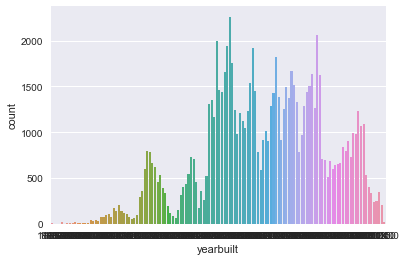

In [5]:
column = "yearbuilt"
print(train[column].describe())
sns.countplot(train[column])
train.groupby(column).agg({"logerror":"std","parcelid":"count"})

In [6]:
train.sample(5)

,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
84985,12934218,0.0478,2016-10-13,1.0,NaN,NaN,3.0,4.0,NaN,4.0,...,NaN,NaN,167080.0,276232.0,2015.0,109152.0,3681.43,NaN,NaN,6.037401e+13
69139,12367638,0.0090,2016-08-24,NaN,NaN,NaN,3.0,4.0,NaN,7.0,...,NaN,NaN,44351.0,62683.0,2015.0,18332.0,1906.43,NaN,NaN,6.037534e+13
45178,17140542,0.0843,2016-06-14,NaN,NaN,NaN,2.0,2.0,NaN,NaN,...,1.0,NaN,121000.0,345000.0,2015.0,224000.0,3733.60,NaN,NaN,6.111005e+13
3780,11398338,-0.1267,2016-01-20,NaN,NaN,NaN,1.0,2.0,NaN,7.0,...,NaN,NaN,16316.0,52818.0,2015.0,36502.0,4939.42,NaN,NaN,6.037601e+13
45242,14116660,-0.0080,2016-06-14,NaN,NaN,NaN,2.5,4.0,NaN,NaN,...,2.0,NaN,197853.0,588243.0,2015.0,390390.0,6951.90,NaN,NaN,6.059086e+13


#### Keep only significant columns containing more than thresh_null values

In [7]:
# PARAMS
threshold = 0.6 * len(train)

In [8]:
cols_to_keep = [ col for col in train.columns.values if len(train[~train[col].isnull()]) > threshold ]
train = train[cols_to_keep]
train.dtypes
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90275 entries, 0 to 90274
Data columns (total 31 columns):
parcelid                        90275 non-null int64
logerror                        90275 non-null float64
transactiondate                 90275 non-null object
bathroomcnt                     90275 non-null float64
bedroomcnt                      90275 non-null float64
buildingqualitytypeid           57364 non-null float64
calculatedbathnbr               89093 non-null float64
calculatedfinishedsquarefeet    89614 non-null float64
finishedsquarefeet12            85596 non-null float64
fips                            90275 non-null float64
fullbathcnt                     89093 non-null float64
heatingorsystemtypeid           56080 non-null float64
latitude                        90275 non-null float64
longitude                       90275 non-null float64
lotsizesquarefeet               80125 non-null float64
propertycountylandusecode       90274 non-null object
propertylanduse

In [9]:
col = 'taxamount'
len(train[train[col].isnull()])

6

In [10]:
train.logerror.describe()

count    90275.000000
mean         0.011457
std          0.161079
min         -4.605000
25%         -0.025300
50%          0.006000
75%          0.039200
max          4.737000
Name: logerror, dtype: float64

C:\Programs\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


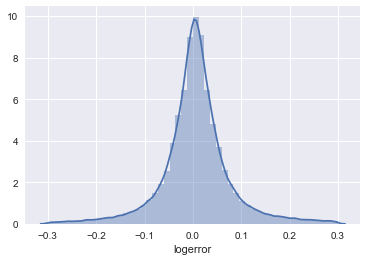

In [11]:
sns.distplot(train[(train.logerror < 0.3) & (train.logerror > -0.3)].logerror)

In [12]:
train.corr()['logerror'].sort_values()

heatingorsystemtypeid          -0.025018
buildingqualitytypeid          -0.009573
taxamount                      -0.006671
regionidzip                    -0.006507
unitcnt                        -0.003983
longitude                      -0.003432
landtaxvaluedollarcnt          -0.003051
regionidcity                   -0.002121
regionidcounty                  0.000341
propertylandusetypeid           0.001003
lotsizesquarefeet               0.004835
parcelid                        0.004837
latitude                        0.004915
roomcnt                         0.005760
taxvaluedollarcnt               0.006508
fips                            0.008363
rawcensustractandblock          0.008376
censustractandblock             0.008892
yearbuilt                       0.017312
structuretaxvaluedollarcnt      0.022085
bedroomcnt                      0.025467
bathroomcnt                     0.027889
fullbathcnt                     0.028845
calculatedbathnbr               0.029448
calculatedfinish

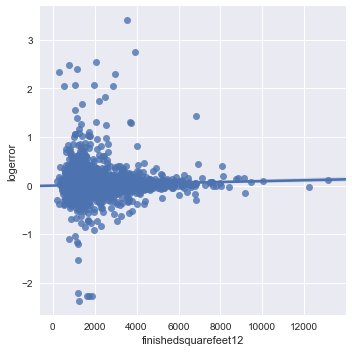

In [13]:
sns.lmplot(x='finishedsquarefeet12',y='logerror',data=train.sample(10000))

quantiles :
0.2    1104.0
0.4    1373.0
0.6    1687.0
0.8    2244.0
Name: finishedsquarefeet12, dtype: float64
   bin_finishedsquarefeet12  logerror
0                  0.000000  0.166928
1                  1.000000  0.153650
2                  1.414214  0.134542
3                  1.732051  0.147112
4                  2.000000  0.189082


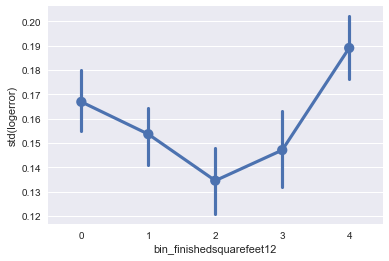

In [14]:
col = 'finishedsquarefeet12'
nb_bins = 5
# calculate quantile
quantiles = train[col].quantile([i/nb_bins for i in range(1,nb_bins)])

print("quantiles :")
print(quantiles)

def map_quantile(x,quantiles):
    result = 0
    for q in quantiles :
        if x < q:
            break
        else:
            result += 1
    return result

#create bins
train['bin_'+col] = train.apply(lambda r : map_quantile(r[col],quantiles),axis=1)

# evaluate std per bin
print(train.groupby('bin_'+col,as_index=False).logerror.std())

# plot
sns.pointplot(x='bin_'+col,y='logerror',data=train,estimator=np.std)

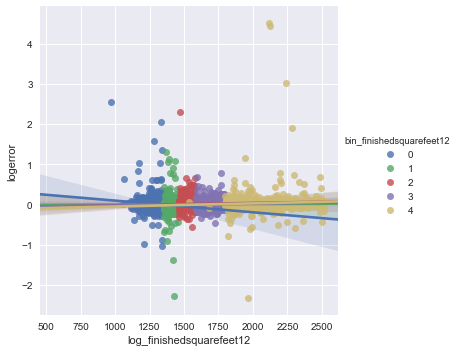

In [17]:
temp_train = train[[col,'bin_'+col,'logerror']].sample(5000)
#temp_train['log_'+col] = np.log(temp_train[col])
med = temp_train[col].median()
temp_train['log_'+col] = temp_train.apply(lambda r : dilate(r[col],med,8000,1000) ,axis=1)
sns.lmplot(x='log_'+col,y='logerror',data=temp_train,hue='bin_'+col)

In [18]:
med = temp_train[col].median()

In [16]:
def dilate(x,ref,m,A):
    pi = np.math.pi
    return ref + A * np.sin(pi/m*(x-ref))

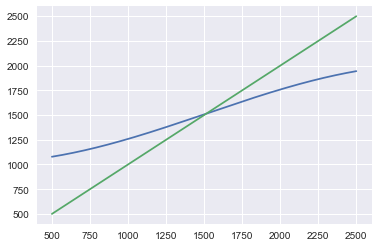

In [194]:
plt.plot(range(500,2500),[dilate(x,med,3000,500) for x in range(500,2500)])
plt.plot(range(500,2500),range(500,2500))

In [19]:
med

1518.0

In [20]:
np.math.pow(2,5)

32.0